(148, 142, 3)


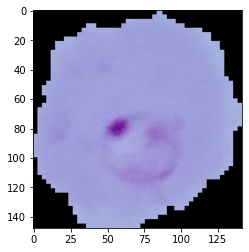

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

GETDIR = 'malaria/cell_images'
CATEGORIES = ['Parasitized', 'Uninfected']

for cat in CATEGORIES:
    get_path = os.path.join(GETDIR, cat) #Get to malaria dir
    for img in os.listdir(get_path):
        img_conv_array = cv2.imread(os.path.join(get_path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_conv_array)
        #cv2.COLOR_BGR2RGB
        break
    break
    
print(img_conv_array.shape)

In [2]:
get_size = 64

In [3]:
train_img = []

def set_trainset():
    for cat in CATEGORIES:
        get_path = os.path.join(GETDIR, cat) #Get to malaria dir
        num_label = CATEGORIES.index(cat)
        for img in os.listdir(get_path):
            try:
                img_conv_array = cv2.imread(os.path.join(get_path, img), cv2.COLOR_BGR2RGB)
                try_size = cv2.resize(img_conv_array, (get_size, get_size))
                train_img.append([try_size, num_label])
            except Exception as t:
                pass
        
set_trainset()
random.shuffle(train_img)

In [4]:
images = []
labels = []

for features, label in train_img:
    images.append(features)
    labels.append(label)

In [5]:
images_train = np.array(images)
images_train.shape

(27558, 64, 64, 3)

In [6]:
from tensorflow.keras.utils import to_categorical
labels_train = to_categorical(np.array(labels))
labels_train.shape

(27558, 2)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.2, random_state=1234)

In [8]:
#X_train = np.array(X_train).astype('float32')
#X_test = np.array(X_test).astype('float32')
#X_train /= 255.0
#X_test /= 255.0

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=448, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

#Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 31, 31, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 64)       

In [25]:
epochs = 20

from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)

np.random.seed(999)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])

Epoch 1/20
345/345 [==============================] - 60s 171ms/step - loss: 0.9719 - accuracy: 0.5056 - val_loss: 0.6923 - val_accuracy: 0.5406
Epoch 2/20
345/345 [==============================] - 58s 167ms/step - loss: 0.6856 - accuracy: 0.5499 - val_loss: 0.6193 - val_accuracy: 0.6705
Epoch 3/20
345/345 [==============================] - 59s 171ms/step - loss: 0.4280 - accuracy: 0.7904 - val_loss: 0.2397 - val_accuracy: 0.9331
Epoch 4/20
345/345 [==============================] - 57s 166ms/step - loss: 0.2025 - accuracy: 0.9393 - val_loss: 0.1602 - val_accuracy: 0.9554
Epoch 5/20
345/345 [==============================] - 59s 171ms/step - loss: 0.1796 - accuracy: 0.9434 - val_loss: 0.1530 - val_accuracy: 0.9559
Epoch 6/20
345/345 [==============================] - 58s 167ms/step - loss: 0.1699 - accuracy: 0.9469 - val_loss: 0.1776 - val_accuracy: 0.9461
Epoch 7/20
345/345 [==============================] - 59s 170ms/step - loss: 0.1665 - accuracy: 0.9482 - val_loss: 0.1645 - val_ac

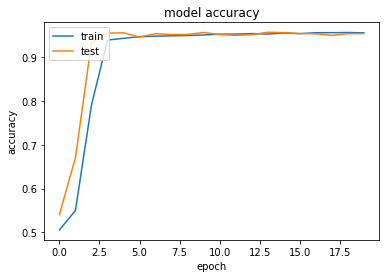

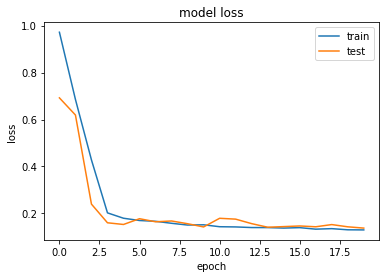

In [26]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
from sklearn.metrics import classification_report

preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=CATEGORIES))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.96      0.95      0.95      2776
  Uninfected       0.95      0.96      0.95      2736

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



<AxesSubplot:>

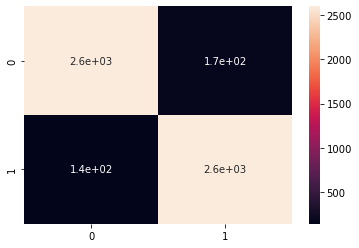

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix=confusion_matrix(y_true, preds)
sns.heatmap(cf_matrix, annot=True)

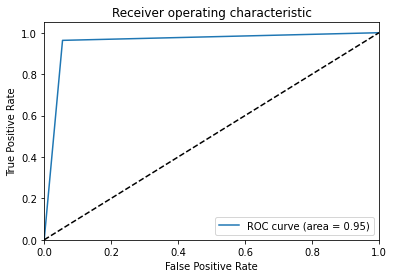

In [28]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

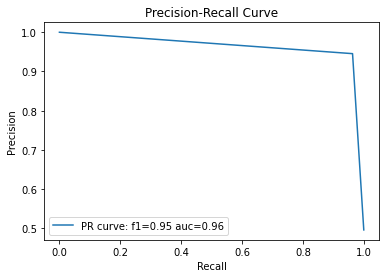

In [29]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

# PRE-TRAINED MODELS

### ResNet50

In [38]:
resnet_model = Sequential()
pretrained_resnet= tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(64, 64, 3),
                    weights="imagenet",
                    classes = 2,
                    pooling='max')

for layer in pretrained_resnet.layers:
    layer.trainable = False
    
resnet_model.add(pretrained_resnet)

resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.25))

resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(0.25))

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.25))

resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dropout(0.25))

resnet_model.add(Dense(32, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [39]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_29 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)              

In [40]:
from tensorflow.keras.optimizers import Adam

resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [41]:
epochs = 5
np.random.seed(26)
history1 = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])

Epoch 1/5
345/345 [==============================] - 92s 260ms/step - loss: 0.4434 - accuracy: 0.8143 - val_loss: 0.2631 - val_accuracy: 0.8931
Epoch 2/5
345/345 [==============================] - 91s 265ms/step - loss: 0.2658 - accuracy: 0.8949 - val_loss: 0.2454 - val_accuracy: 0.9049
Epoch 3/5
345/345 [==============================] - 92s 267ms/step - loss: 0.2454 - accuracy: 0.9048 - val_loss: 0.2219 - val_accuracy: 0.9122
Epoch 4/5
345/345 [==============================] - 92s 266ms/step - loss: 0.2279 - accuracy: 0.9097 - val_loss: 0.2252 - val_accuracy: 0.9140
Epoch 5/5
345/345 [==============================] - 93s 270ms/step - loss: 0.2135 - accuracy: 0.9152 - val_loss: 0.2078 - val_accuracy: 0.9158


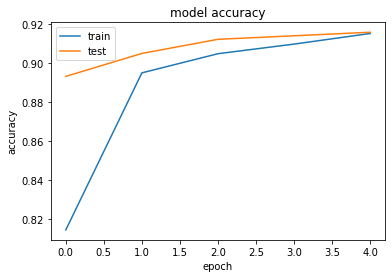

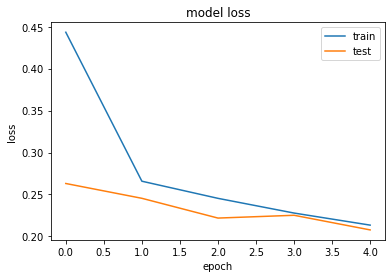

In [42]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
from sklearn.metrics import classification_report

preds = resnet_model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=CATEGORIES))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.91      0.92      0.92      2776
  Uninfected       0.92      0.91      0.91      2736

    accuracy                           0.92      5512
   macro avg       0.92      0.92      0.92      5512
weighted avg       0.92      0.92      0.92      5512



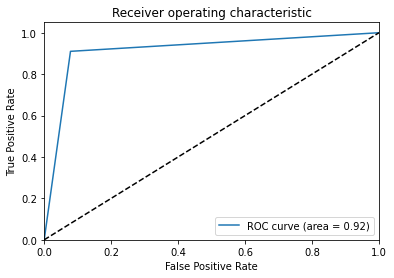

In [44]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

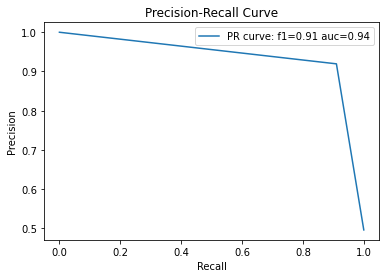

In [45]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

### EfficientNet

In [23]:
efficientNet_model = Sequential()
pretrained_efficientNet= tf.keras.applications.EfficientNetB0(include_top=False,
                    input_shape=(64, 64, 3),
                    weights="imagenet",
                    classes = 2,
                    pooling='max')

for layer in pretrained_efficientNet.layers:
    layer.trainable = False
    
efficientNet_model.add(pretrained_efficientNet)

efficientNet_model.add(Flatten())

efficientNet_model.add(Dense(512, activation='relu'))
efficientNet_model.add(Dropout(0.25))

efficientNet_model.add(Dense(256, activation='relu'))
efficientNet_model.add(Dropout(0.25))

efficientNet_model.add(Dense(128, activation='relu'))
efficientNet_model.add(Dropout(0.25))

efficientNet_model.add(Dense(64, activation='relu'))
efficientNet_model.add(Dropout(0.25))

efficientNet_model.add(Dense(32, activation='relu'))
efficientNet_model.add(Dense(2, activation='softmax'))

In [24]:
efficientNet_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [25]:
epochs = 5
np.random.seed(26)
history_en = efficientNet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])

Epoch 1/5
345/345 [==============================] - 58s 157ms/step - loss: 0.2681 - accuracy: 0.8921 - val_loss: 0.1942 - val_accuracy: 0.9238
Epoch 2/5
345/345 [==============================] - 53s 153ms/step - loss: 0.2079 - accuracy: 0.9211 - val_loss: 0.1785 - val_accuracy: 0.9296
Epoch 3/5
345/345 [==============================] - 54s 157ms/step - loss: 0.2012 - accuracy: 0.9231 - val_loss: 0.1789 - val_accuracy: 0.9318
Epoch 4/5
345/345 [==============================] - 54s 156ms/step - loss: 0.1909 - accuracy: 0.9259 - val_loss: 0.1749 - val_accuracy: 0.9312
Epoch 5/5
345/345 [==============================] - 54s 157ms/step - loss: 0.1840 - accuracy: 0.9294 - val_loss: 0.1730 - val_accuracy: 0.9329


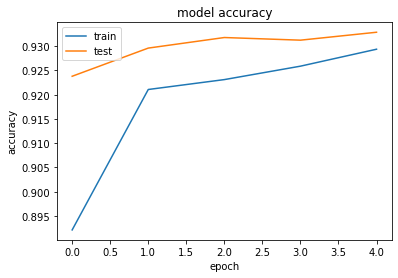

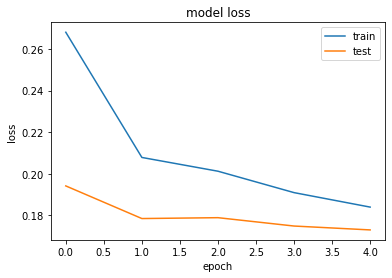

In [26]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_en.history['accuracy'])
plt.plot(history_en.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_en.history['loss'])
plt.plot(history_en.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
from sklearn.metrics import classification_report

preds = efficientNet_model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=CATEGORIES))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.94      0.93      0.93      2816
  Uninfected       0.92      0.94      0.93      2696

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512



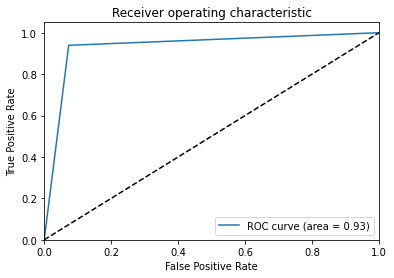

In [28]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

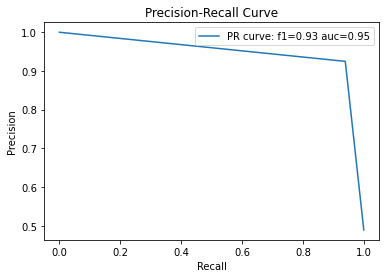

In [29]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

### VGG19

In [30]:
vgg19_model = Sequential()
pretrained_vgg19= tf.keras.applications.VGG19(include_top=False,
                    input_shape=(64, 64, 3),
                    weights="imagenet",
                    classes = 2,
                    pooling='max')

for layer in pretrained_vgg19.layers:
    layer.trainable = False
    
vgg19_model.add(pretrained_vgg19)

vgg19_model.add(Flatten())

vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dropout(0.25))

vgg19_model.add(Dense(128, activation='relu'))
vgg19_model.add(Dropout(0.25))

vgg19_model.add(Dense(64, activation='relu'))
vgg19_model.add(Dropout(0.25))

vgg19_model.add(Dense(32, activation='relu'))
vgg19_model.add(Dense(2, activation='softmax'))

In [31]:
from tensorflow.keras.optimizers import Adam
vgg19_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [32]:
epochs = 5
np.random.seed(45)
history_VGG19 = vgg19_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, callbacks=[callback])

Epoch 1/5
345/345 [==============================] - 198s 573ms/step - loss: 0.4111 - accuracy: 0.8799 - val_loss: 0.2071 - val_accuracy: 0.9269
Epoch 2/5
345/345 [==============================] - 198s 574ms/step - loss: 0.2167 - accuracy: 0.9219 - val_loss: 0.1833 - val_accuracy: 0.9356
Epoch 3/5
345/345 [==============================] - 196s 569ms/step - loss: 0.1900 - accuracy: 0.9322 - val_loss: 0.1928 - val_accuracy: 0.9381
Epoch 4/5
345/345 [==============================] - 198s 576ms/step - loss: 0.1769 - accuracy: 0.9371 - val_loss: 0.1645 - val_accuracy: 0.9412
Epoch 5/5
345/345 [==============================] - 199s 576ms/step - loss: 0.1680 - accuracy: 0.9404 - val_loss: 0.1720 - val_accuracy: 0.9394


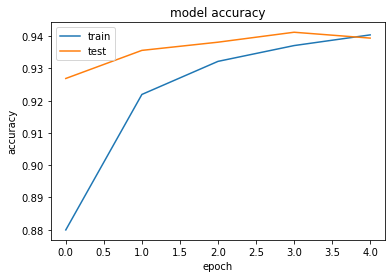

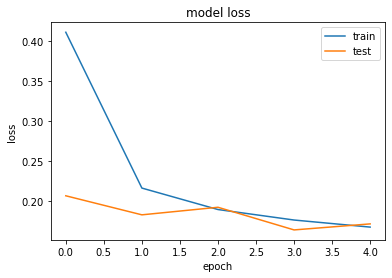

In [33]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_VGG19.history['accuracy'])
plt.plot(history_VGG19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_VGG19.history['loss'])
plt.plot(history_VGG19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [34]:
from sklearn.metrics import classification_report

preds = efficientNet_model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=CATEGORIES))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.94      0.93      0.93      2816
  Uninfected       0.92      0.94      0.93      2696

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512



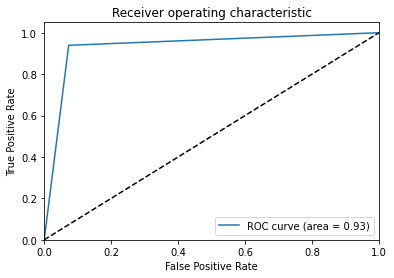

In [35]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

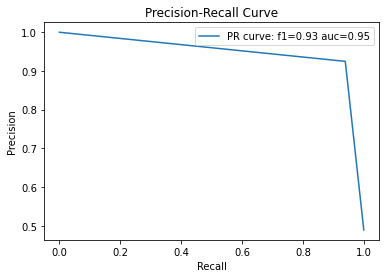

In [36]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

In [12]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
def build_model(hp):
    ft_model = keras.Sequential()
    
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

    ft_model.add(Conv2D(hp.Choice('filters', [8, 16, 32, 64]), kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
    ft_model.add(MaxPooling2D(pool_size=(2, 2)))
    ft_model.add(Dropout(0.25))

    ft_model.add(Conv2D(hp.Choice('filters', [8, 16, 32, 64]), kernel_size=(3, 3), activation='relu'))
    ft_model.add(MaxPooling2D(pool_size=(2, 2)))
    ft_model.add(Dropout(0.25))

    ft_model.add(Conv2D(hp.Choice('filters', [8, 16, 32, 64]), kernel_size=(3, 3), activation='relu'))
    ft_model.add(MaxPooling2D(pool_size=(2, 2)))
    ft_model.add(Dropout(0.25))
    
    ft_model.add(keras.layers.Flatten(input_shape =(64,64,3)))
    ft_model.add(keras.layers.Dense(units=hp_units, activation= 'relu'))
    ft_model.add(Dropout(0.2))
    ft_model.add(keras.layers.Dense(units=hp_units, activation= 'relu'))
    ft_model.add(Dropout(0.2))
    ft_model.add(keras.layers.Dense(units=hp_units, activation= 'relu'))
    ft_model.add(Dropout(0.2))
    ft_model.add(keras.layers.Dense(units=hp_units, activation= 'relu'))
    ft_model.add(Dropout(0.15))
    ft_model.add(Dropout(0.05))
    ft_model.add(Dense(units=2, activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    ft_model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss= keras.losses.CategoricalCrossentropy(from_logits = True),
                  metrics=['accuracy'])
    return ft_model

In [13]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=12,
                     factor = 3,
                     overwrite = True)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

In [15]:
tuner.search(images_train, labels_train, validation_split=0.2, callbacks=[stop_early])
best_hp = tuner.get_best_hyperparameters(num_trials=3)[0]
print(f'''
Wagwan Ceejay
Optimal number of units in the first fully-connected layer = {best_hp.get('units')}
Optimal learning rate for the optimizer = {best_hp.get('learning_rate')}
     ''')

Trial 30 Complete [00h 01m 39s]
val_accuracy: 0.511066734790802

Best val_accuracy So Far: 0.953374445438385
Total elapsed time: 00h 54m 17s
INFO:tensorflow:Oracle triggered exit

Wagwan Ceejay
Optimal number of units in the first fully-connected layer = 448
Optimal learning rate for the optimizer = 0.001
     


In [16]:
tuning_model = tuner.hypermodel.build(best_hp)
history_tuner = tuning_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=64, callbacks=[stop_early])

Epoch 1/12
345/345 [==============================] - 32s 91ms/step - loss: 1.3879 - accuracy: 0.5435 - val_loss: 0.6739 - val_accuracy: 0.6047
Epoch 2/12
345/345 [==============================] - 31s 90ms/step - loss: 0.6292 - accuracy: 0.6471 - val_loss: 0.3631 - val_accuracy: 0.8813
Epoch 3/12
345/345 [==============================] - 31s 91ms/step - loss: 0.2709 - accuracy: 0.9057 - val_loss: 0.1769 - val_accuracy: 0.9452
Epoch 4/12
345/345 [==============================] - 30s 88ms/step - loss: 0.1927 - accuracy: 0.9394 - val_loss: 0.1888 - val_accuracy: 0.9483
Epoch 5/12
345/345 [==============================] - 31s 89ms/step - loss: 0.1833 - accuracy: 0.9427 - val_loss: 0.1563 - val_accuracy: 0.9526
Epoch 6/12
345/345 [==============================] - 31s 89ms/step - loss: 0.1705 - accuracy: 0.9456 - val_loss: 0.1831 - val_accuracy: 0.9492
Epoch 7/12
345/345 [==============================] - 31s 91ms/step - loss: 0.1636 - accuracy: 0.9477 - val_loss: 0.1592 - val_accuracy:

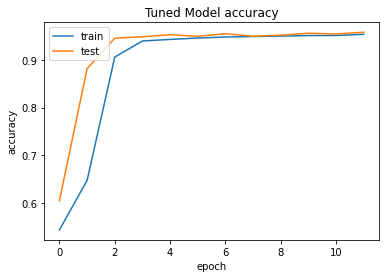

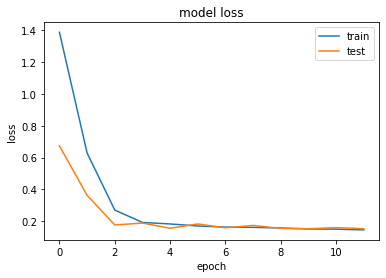

In [17]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_tuner.history['accuracy'])
plt.plot(history_tuner.history['val_accuracy'])
plt.title('Tuned Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_tuner.history['loss'])
plt.plot(history_tuner.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [18]:
from sklearn.metrics import classification_report

preds = tuning_model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=CATEGORIES))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.97      0.95      0.96      2776
  Uninfected       0.95      0.97      0.96      2736

    accuracy                           0.96      5512
   macro avg       0.96      0.96      0.96      5512
weighted avg       0.96      0.96      0.96      5512



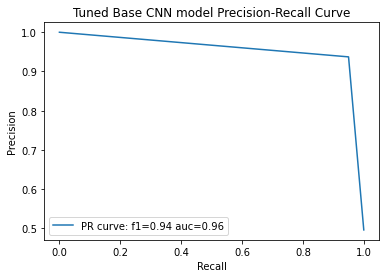

In [81]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Base CNN model Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

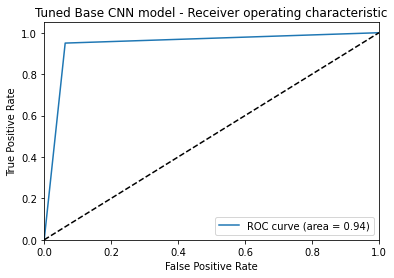

In [82]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Base CNN model - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [61]:
def rn_build_model(hp):
    ft_vgg19_model = keras.Sequential()
    
    ft_pretrained_vgg19= tf.keras.applications.VGG19(include_top=False,
                        input_shape=(64, 64, 3),
                        weights="imagenet",
                        classes = 2,
                        pooling='max')
    
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

    for layer in ft_pretrained_vgg19.layers:
        layer.trainable = False

    ft_vgg19_model.add(ft_pretrained_vgg19)

    ft_vgg19_model.add(Flatten(input_shape =(64,64,3)))

    ft_vgg19_model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    ft_vgg19_model.add(Dropout(0.25))

    ft_vgg19_model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    ft_vgg19_model.add(Dropout(0.25))

    ft_vgg19_model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    ft_vgg19_model.add(Dropout(0.25))

    ft_vgg19_model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    ft_vgg19_model.add(Dense(2, activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    ft_vgg19_model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss= keras.losses.CategoricalCrossentropy(from_logits = True),
                  metrics=['accuracy'])
    return ft_vgg19_model

In [62]:
tuner_rn = kt.Hyperband(rn_build_model,
                     objective='val_accuracy',
                     max_epochs=12,
                     factor = 3,
                     overwrite = True)

In [66]:
tuner_rn.search(images_train, labels_train, validation_split=0.2, callbacks=[stop_early])
best_hp_rn = tuner_rn.get_best_hyperparameters(num_trials=3)[0]
print(f'''
VGG19
W21007844
Optimal number of units in the first fully-connected layer = {best_hp_rn.get('units')}
Optimal learning rate for the optimizer = {best_hp_rn.get('learning_rate')}
     ''')

Trial 30 Complete [00h 41m 24s]
val_accuracy: 0.9430333971977234

Best val_accuracy So Far: 0.9455732703208923
Total elapsed time: 09h 27m 42s
INFO:tensorflow:Oracle triggered exit

ResNet 50
Wagwan Ceejay
Optimal number of units in the first fully-connected layer = 416
Optimal learning rate for the optimizer = 0.001
     


In [67]:
rn_tuning_model = tuner_rn.hypermodel.build(best_hp_rn)
history_tuner = rn_tuning_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, callbacks=[stop_early])

Epoch 1/5
345/345 [==============================] - 196s 566ms/step - loss: 0.4521 - accuracy: 0.8870 - val_loss: 0.1955 - val_accuracy: 0.9305
Epoch 2/5
345/345 [==============================] - 197s 572ms/step - loss: 0.2030 - accuracy: 0.9280 - val_loss: 0.1816 - val_accuracy: 0.9347
Epoch 3/5
345/345 [==============================] - 199s 577ms/step - loss: 0.1840 - accuracy: 0.9344 - val_loss: 0.1678 - val_accuracy: 0.9392
Epoch 4/5
345/345 [==============================] - 202s 586ms/step - loss: 0.1702 - accuracy: 0.9371 - val_loss: 0.1768 - val_accuracy: 0.9385
Epoch 5/5
345/345 [==============================] - 198s 575ms/step - loss: 0.1626 - accuracy: 0.9413 - val_loss: 0.1645 - val_accuracy: 0.9436


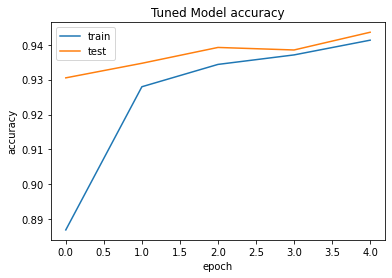

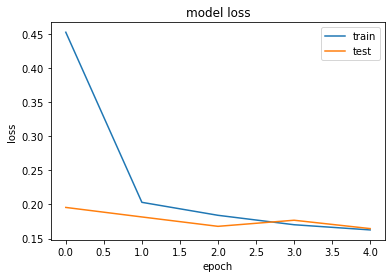

In [68]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_tuner.history['accuracy'])
plt.plot(history_tuner.history['val_accuracy'])
plt.title('Tuned Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_tuner.history['loss'])
plt.plot(history_tuner.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [70]:
from sklearn.metrics import classification_report

preds = rn_tuning_model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=CATEGORIES))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.95      0.94      0.94      2776
  Uninfected       0.94      0.95      0.94      2736

    accuracy                           0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



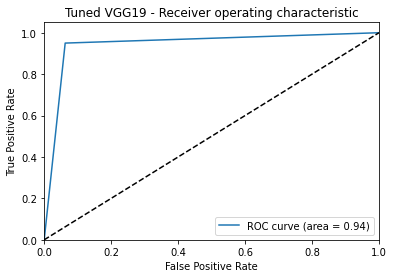

In [79]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned VGG19 - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

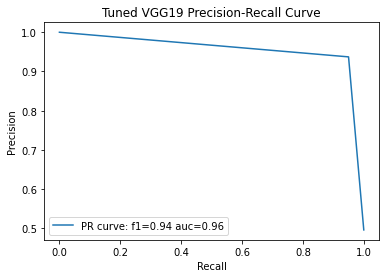

In [78]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned VGG19 Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()